In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# develop a global transfare matrix

def f(x,y):
        difference = x-y
        square = difference**2
        negate = -square
        return  0.1*np.exp(negate/2)
print('here1')
v = np.linspace(-15,15,50)
w = np.linspace(-15,15,30)

matrix=np.ones((len(v),len(w)))
for i in range(len(v)):
    for j in range(len(w)): 
            matrix[i][j]=f(w[j],v[i])
print(matrix)

here1
[[1.00000000e-001 5.85624026e-002 1.17618475e-002 ... 3.92796771e-171
  6.50439100e-184 3.69388307e-197]
 [8.29093862e-002 9.14715304e-002 3.46103477e-002 ... 8.69926004e-164
  2.71384103e-176 2.90351628e-189]
 [4.72514129e-002 9.82110612e-002 7.00073729e-002 ... 1.32435409e-156
  7.78340387e-169 1.56881881e-181]
 ...
 [1.56881881e-181 7.78340387e-169 1.32435409e-156 ... 7.00073729e-002
  9.82110612e-002 4.72514129e-002]
 [2.90351628e-189 2.71384103e-176 8.69926004e-164 ... 3.46103477e-002
  9.14715304e-002 8.29093862e-002]
 [3.69388307e-197 6.50439100e-184 3.92796771e-171 ... 1.17618475e-002
  5.85624026e-002 1.00000000e-001]]


In [16]:
#find the constant of normalizing matrix (Pij/Pj)
W=2
matrix1=matrix
P=np.matmul([W]*len(matrix1),matrix1)
con=np.divide(W*matrix1,P)

In [17]:
# Find the measured results (fj)   
x=np.linspace(0,50,30)#defining the x-axis
x1=np.linspace(0,50,50)
def find_fj():
    def f(x):
        if (x>10 and x<30):
            return 5
        else:
            return 0
    y = np.zeros(30)
    for i in range(30):
            y[i]=(f(x[i]))


    f=np.matmul(matrix1,y)
    return f

measured_results = find_fj()

In [18]:
def f(x):
    if (x>10 and x<30):
        return 5
    else:
        return 0
y = np.zeros(len(x))
for i in range(len(x)):
        y[i]=(f(x[i]))
original=y


In [19]:
#Find working fj:
def working_fj(transfareMatrix,result):
    return np.matmul(transfareMatrix,result)

result=np.ones(len(matrix1[1]))
fnj=working_fj(matrix1,result)

In [20]:
def Recover(actual,measured,varying,k):
    var = np.divide(measured,varying)
    prem_res = np.matmul(var,k)
    final_result= prem_res*actual
    return final_result


In [21]:
rec =Recover(result,measured_results,fnj,con)
n=0
while (n<3000):
    fnj=working_fj(matrix1,rec)
    rec=Recover(rec,measured_results,fnj,con)
    n+=1

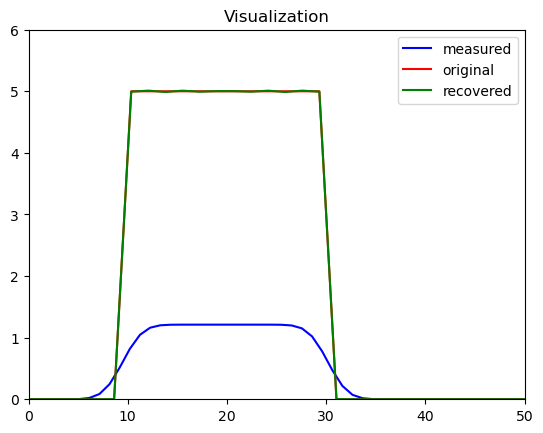

In [23]:

    plt.plot(x1,measured_results,"blue",label="measured")
    plt.plot(x,original,"red",label="original")
    plt.plot(x,rec,"green",label="recovered")
    plt.title("Visualization")
    
    plt.ylim(min(original),max(original)+1)
    plt.xlim(min(x),max(x))
    plt.legend()
    plt.show()